In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
df = pd.read_csv("/Users/sofietosti/Desktop/DM Exam/clean_data.csv", sep=',', header=0)

In [2]:
df.head()

,index,date,year,manner_of_death,armed,age,gender,race,city,state,state_ID,signs_of_mental_illness,threat_level,flee,flee_encoded,body_camera
0,0,2015-01-02,2015,0,1,53,1,0,Shelton,WA,47,True,attack,Not fleeing,0,False
1,1,2015-01-02,2015,0,1,47,1,5,Aloha,OR,37,False,attack,Not fleeing,0,False
2,2,2015-01-03,2015,1,0,23,1,2,Wichita,KS,16,False,other,Not fleeing,0,False
3,3,2015-01-04,2015,0,1,32,1,5,San Francisco,CA,4,True,attack,Not fleeing,0,False
4,4,2015-01-04,2015,0,1,39,1,2,Evans,CO,5,False,attack,Not fleeing,0,False


In [3]:
df['month'] = pd.DatetimeIndex(df['date']).month
month_df = df[['month']].copy()
month_df['record'] = 1
month_df

,month,record
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
5027,9,1
5028,9,1
5029,9,1
5030,9,1


In [4]:
jan = 0
feb = 0
mar = 0
apr = 0
may = 0
jun = 0
jul = 0
aug = 0
sep = 0
octo = 0 
nov = 0
dec = 0

monthList = month_df['month'].tolist()

for a in monthList:
    if a == 1:
        jan+=1
    elif a == 2:
        feb+=1
    elif a == 3:
        mar+=1
    elif a == 4:
        apr+=1
    elif a == 5:
        may+=1
    elif a == 6:
        jun+=1
    elif a == 7:
        jul+=1
    elif a == 8:
        aug+=1
    elif a == 9:
        sep+=1
    elif a == 10:
        octo+=1
    elif a == 11:
        nov+=1
    elif a == 12:
        dec+=1
    
print("January: ", jan)
print("February: ", feb)
print("Marts: ", mar)
print("April: ", apr)
print("May: ", may)
print("June: ", jun)
print("July: ", jul)
print("August: ", aug)
print("September: ", sep)
print("October: ", octo)
print("November: ", nov)
print("December: ", dec)


January:  504
February:  462
Marts:  503
April:  432
May:  418
June:  426
July:  443
August:  439
September:  337
October:  367
November:  354
December:  347


In [5]:
data = [[0, 504], [1,462], [3,503], [4,432], [5,418], [6,426], [7,443], [8,439], [9,337], [10,367], [11,354], [12,347]]
df_lin = pd.DataFrame(data,columns = ['month', 'record'])
df_lin

,month,record
0,0,504
1,1,462
2,3,503
3,4,432
4,5,418
5,6,426
6,7,443
7,8,439
8,9,337
9,10,367


In [6]:
#DO LINEAR REGRESSION
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#trains linear regression
X = np.array(df_lin['month']).reshape(-1, 1)
y = np.array(df_lin['record']).reshape(-1, 1)

month_df.dropna(inplace = True)

#do split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

regr = LinearRegression()

#train data 
regr.fit(X_train, y_train)

#print regression score 
print(regr.score(X_test, y_test))

0.8367051293653437


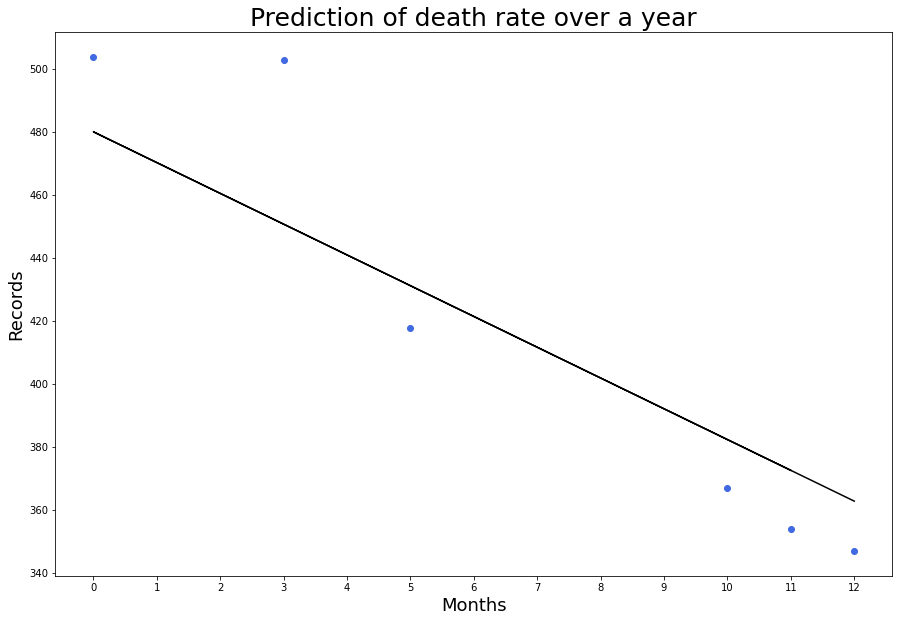

In [9]:
plt.figure(figsize =(15, 10))

plt.xlabel("Months", fontsize=18, color='black')
plt.ylabel("Records", fontsize=18, color='black')
plt.title('Prediction of death rate over a year', fontsize=25, color='black')

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='royalblue')
plt.plot(X_test, y_pred, color ='black')

plt.xticks(np.arange(min(X), max(X)+1, 1.0))
  
plt.show()